In [1]:
import numpy as np
import pandas as pd
import json
from epilepsypcm.utils.outcome_params import node_location, early_propogation, irritative_zone

import warnings
warnings.filterwarnings("ignore")

from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
from epilepsypcm.models.base_models import *
from sklearn.metrics import auc

all_positive_patients = pd.read_csv("df_final.csv", sep = ',').reset_index(drop = True)
print(all_positive_patients["outcome"].value_counts())


0.0    259
1.0     56
Name: outcome, dtype: int64


# Comparing Smote, Random Upsampling, and No Upsampling

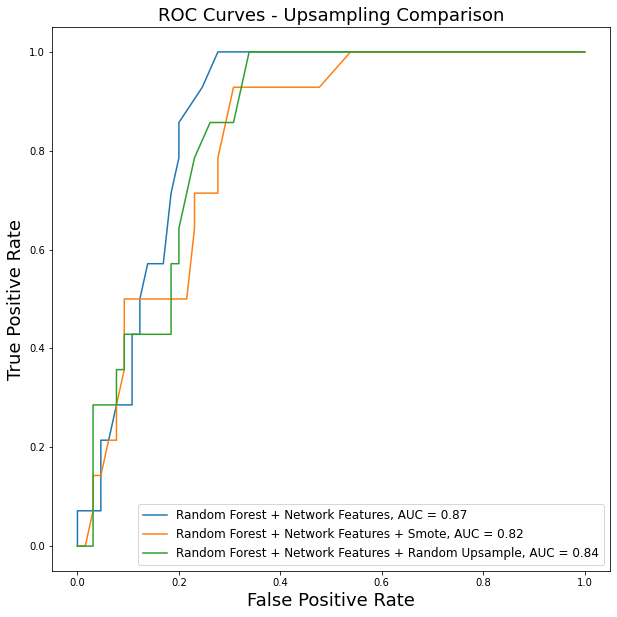

In [2]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves - Upsampling Comparison", fontsize = 18)
plt.xlabel("False Positive Rate", fontsize = 18)
plt.ylabel("True Positive Rate", fontsize = 18)


X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV",
         "InDegree", "OutDegree", "EV", "Closeness"]

#random forest with network features
smote = False
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest with network features SMOTE
smote = True
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features + Smote, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


#random forest with network features random upsample
smote = "resample"
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features + Random Upsample, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right', prop={'size': 12})


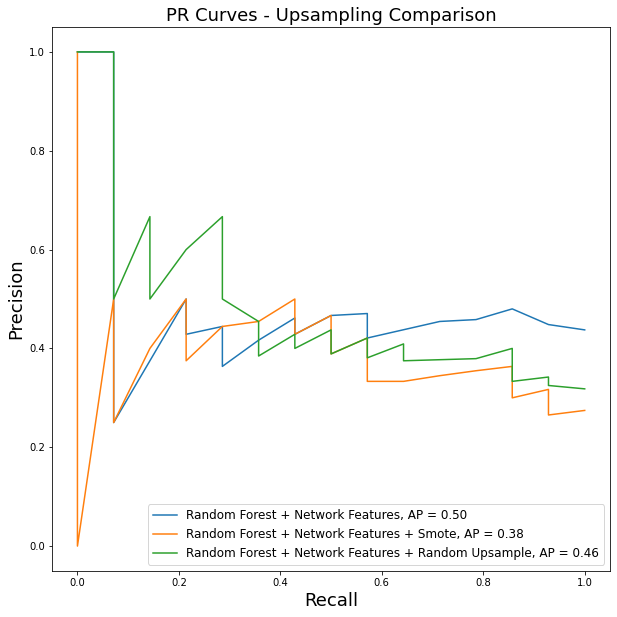

In [3]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves - Upsampling Comparison", fontsize = 18)
plt.xlabel("Recall", fontsize = 18)
plt.ylabel("Precision", fontsize = 18)

#random forest + network features
smote = False
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + network features + smote
smote = True
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features + Smote, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + network features + random upsample
smote = "resample"
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features + Random Upsample, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right', prop={'size': 12})

In [4]:
from sklearn.metrics import confusion_matrix

#reg
print("No Upsampling")
smote = False
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)

optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("TN: ", tn, "FP: ", fp, "TP: ", tp, "FN: ", fn)
print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp), "\n")

#smote
print("Smote")
smote = True
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]

print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("TN: ", tn, "FP: ", fp, "TP: ", tp, "FN: ", fn)
print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp), "\n")

#random upsample
print("Upsample")
smote = "resample"
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)

optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("TN: ", tn, "FP: ", fp, "TP: ", tp, "FN: ", fn)
print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


No Upsampling
Optimal roc threshold:  0.22
TN:  49 FP:  16 TP:  13 FN:  1
Accuracy:  0.7848101265822784
Sensitivity:  0.9285714285714286
Specificity:  0.7538461538461538 

Smote
Optimal roc threshold:  0.24
TN:  43 FP:  22 TP:  12 FN:  2
Accuracy:  0.6962025316455697
Sensitivity:  0.8571428571428571
Specificity:  0.6615384615384615 

Upsample
Optimal roc threshold:  0.15
TN:  42 FP:  23 TP:  12 FN:  2
Accuracy:  0.6835443037974683
Sensitivity:  0.8571428571428571
Specificity:  0.6461538461538462


# SMOTE

## All Models + SMOTE

[00:33:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


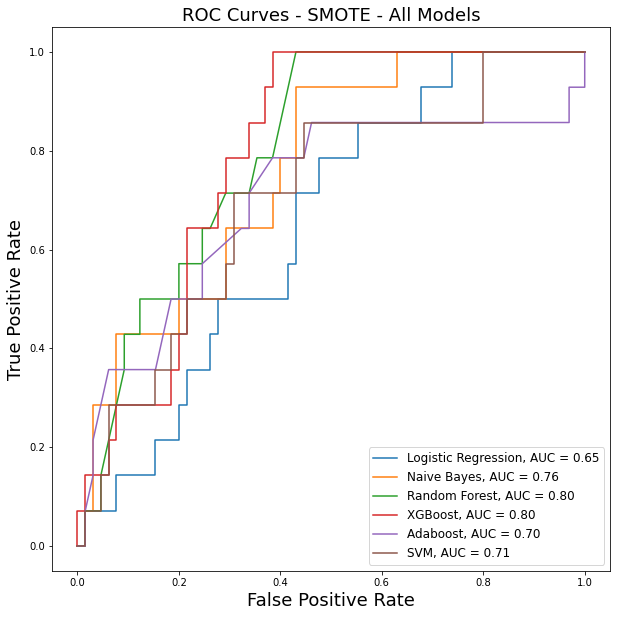

In [5]:
# stim + resp channels

smote = True

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves - SMOTE - All Models", fontsize = 18)
plt.xlabel("False Positive Rate", fontsize = 18)
plt.ylabel("True Positive Rate", fontsize = 18)

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right', prop={'size': 12})


[00:33:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


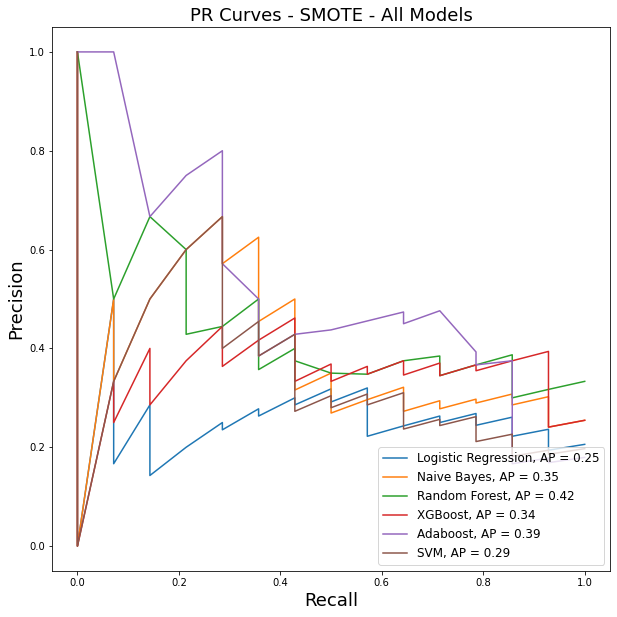

In [6]:
smote = True

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves - SMOTE - All Models", fontsize = 18)
plt.xlabel("Recall", fontsize = 18)
plt.ylabel("Precision", fontsize = 18)

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right', prop={'size': 12})

## Random Forest + SMOTE

In [7]:
#getting model and stats
from sklearn.metrics import confusion_matrix

smote = True

max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Optimal roc threshold:  0.27
Accuracy:  0.6962025316455697
Sensitivity:  0.6428571428571429
Specificity:  0.7076923076923077


In [8]:
# getting labels

epilepsy_normal = []
channels_normal = []
correct_normal = []

non_epilepsy = []
channels_non = []
correct_non = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
        
        if y_pred[i] >= optimal_thresh: #seeing if prediction was correct for true positives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Correctly labeled - " + label)
            
        elif y_pred[i] < optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Mislabeled - " + label)
            
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
        
        if y_pred[i] < optimal_thresh: #seeing if prediction was correct for true negatives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Correctly labeled - " + label)            
            
        elif y_pred[i] >= optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Mislabeled - " + label)    
    
    i += 1
    
correct_normal_ordered = [x for _,x in sorted(zip(epilepsy_normal, correct_normal), reverse = True)]
correct_non_ordered = [x for _,x in sorted(zip(non_epilepsy, correct_non), reverse = True)]
            
print("\n")
print("Positive labels")            
print(*correct_normal_ordered, sep = "\n")

print("\n")
print("Negative labels")
print(*correct_non_ordered, sep = "\n")



Positive labels
Correctly labeled - Left fronto-temporal grid
Correctly labeled - left anterior hippocampus
Correctly labeled - right posterior hippocampus
Correctly labeled - Left fronto-temporal grid
Correctly labeled - Left fronto-temporal grid
Correctly labeled - Right amygdala depth
Correctly labeled - Right anterior temporal inferior
Correctly labeled - Right anterior hippocampus
Correctly labeled - left amygdala
Correctly labeled - left amygdala
Correctly labeled - Basal temporal anterior
Mislabeled - Right medial tumor inferior
Mislabeled - Right amygdala
Mislabeled - Left orbitofrontal depth


Negative labels
Mislabeled - Basal temporal posterior-temporal
Mislabeled - Left nodule E
Mislabeled - Right fusiform
Mislabeled - Left fronto-temporal grid
Mislabeled - Right piriform
Mislabeled - Basal temporal mid-temporal
Mislabeled - left anterior hippocampus
Mislabeled - Right anterior insular depth
Mislabeled - Left fronto-temporal grid
Mislabeled - Left temporal grid
Mislabeled

<AxesSubplot:title={'center':'Random Forest + SMOTE Boxplot'}, xlabel='non SOZ                                      SOZ', ylabel='P(SOZ)'>

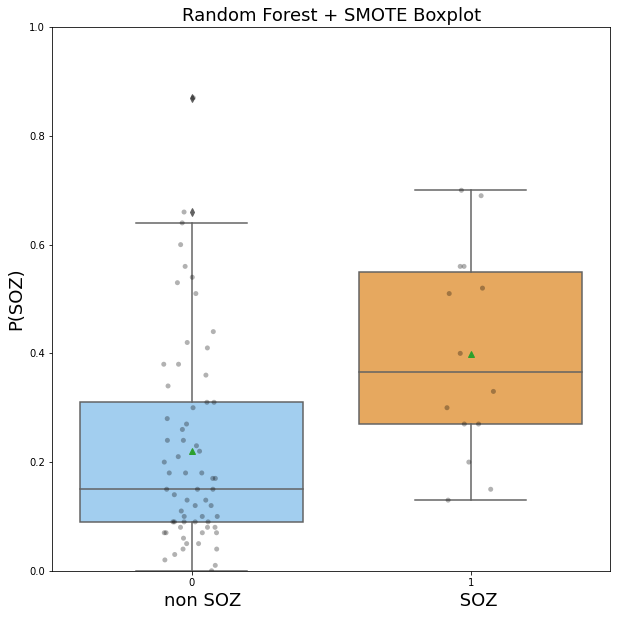

In [9]:
# Plotting boxplot
import seaborn as sns

plt.figure(figsize = (10,10))
plt.title("Random Forest + SMOTE Boxplot", fontsize = 18)
plt.xlabel("non SOZ                                      SOZ", fontsize = 18)
plt.ylabel("P(SOZ)", fontsize = 18)
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


Most Significant Feature:  Closeness
Least Significant Feature:  SigResp


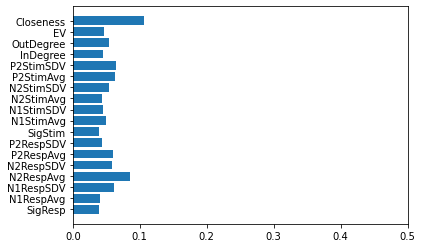

In [10]:
rf.feature_importances_

plt.barh(X_list[1:], rf.feature_importances_)
plt.xlim([0,.5])
print("Most Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(max(rf.feature_importances_))])
print("Least Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(min(rf.feature_importances_))])

# Duplicated Upsampling

## All Models + Random Upsampling

[00:33:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


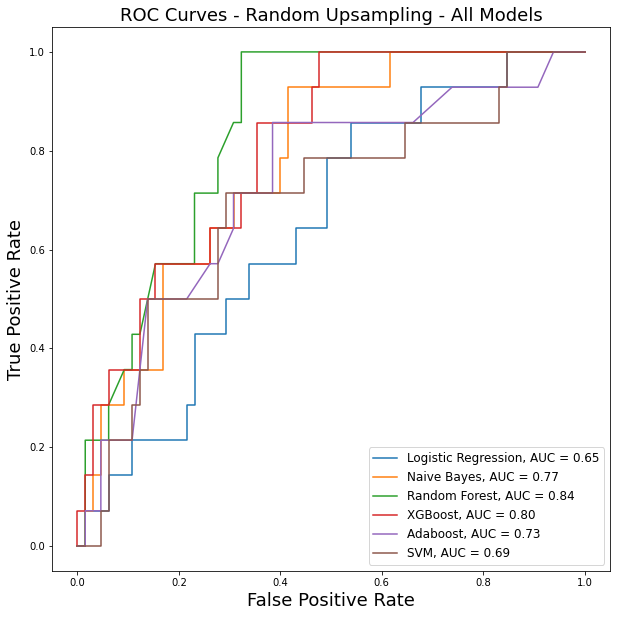

In [11]:
# stim + resp channels

smote = "resample"

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves - Random Upsampling - All Models", fontsize = 18)
plt.xlabel("False Positive Rate", fontsize = 18)
plt.ylabel("True Positive Rate", fontsize = 18)

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right', prop={'size': 12})


[00:33:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


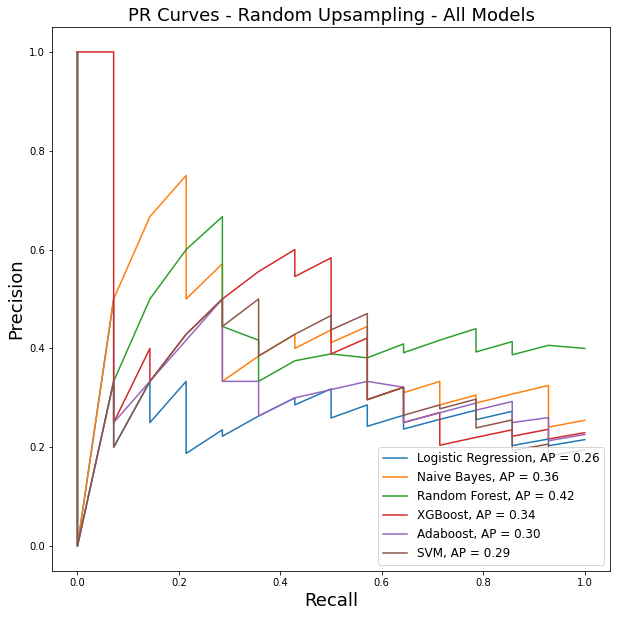

In [12]:
smote = "resample"

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves - Random Upsampling - All Models", fontsize = 18)
plt.xlabel("Recall", fontsize = 18)
plt.ylabel("Precision", fontsize = 18)

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right', prop={'size': 12})

## Random Forest + Random Upsampling

In [13]:
#getting model and stats
from sklearn.metrics import confusion_matrix

smote = "resample"

max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Optimal roc threshold:  0.26
Accuracy:  0.759493670886076
Sensitivity:  0.7857142857142857
Specificity:  0.7538461538461538


In [14]:
# getting labels

epilepsy_normal = []
channels_normal = []
correct_normal = []

non_epilepsy = []
channels_non = []
correct_non = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
        
        if y_pred[i] > (optimal_thresh + 0.01): #seeing if prediction was correct for true positives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Correctly labeled - " + label)
            
        elif y_pred[i] < (optimal_thresh + 0.01):
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Mislabeled - " + label)
            
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
        
        if y_pred[i] < optimal_thresh: #seeing if prediction was correct for true negatives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Correctly labeled - " + label)            
            
        elif y_pred[i] > optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Mislabeled - " + label)    
    
    i += 1
    
correct_normal_ordered = [x for _,x in sorted(zip(epilepsy_normal, correct_normal), reverse = True)]
correct_non_ordered = [x for _,x in sorted(zip(non_epilepsy, correct_non), reverse = True)]
            
print("\n")
print("Positive labels")            
print(*correct_normal_ordered, sep = "\n")

print("\n")
print("Negative labels")
print(*correct_non_ordered, sep = "\n")



Positive labels
Correctly labeled - Left fronto-temporal grid
Correctly labeled - left anterior hippocampus
Correctly labeled - Left fronto-temporal grid
Correctly labeled - Right anterior temporal inferior
Correctly labeled - Left fronto-temporal grid
Correctly labeled - right posterior hippocampus
Correctly labeled - left amygdala
Correctly labeled - Right amygdala depth
Correctly labeled - left amygdala
Correctly labeled - Right anterior hippocampus
Correctly labeled - Left orbitofrontal depth
Mislabeled - Right amygdala
Mislabeled - Basal temporal anterior
Mislabeled - Right medial tumor inferior


Negative labels
Mislabeled - Basal temporal posterior-temporal
Mislabeled - Left fronto-temporal grid
Mislabeled - Right amygdala
Mislabeled - Right fusiform
Mislabeled - Left nodule E
Mislabeled - left anterior cortical dysplasia
Mislabeled - Left fronto-temporal grid
Mislabeled - Basal temporal mid-temporal
Mislabeled - Right piriform
Mislabeled - right posterior hippocampus
Mislabel

<AxesSubplot:title={'center':'Random Forest + Random Upsampling Boxplot'}, xlabel='non SOZ                                      SOZ', ylabel='P(SOZ)'>

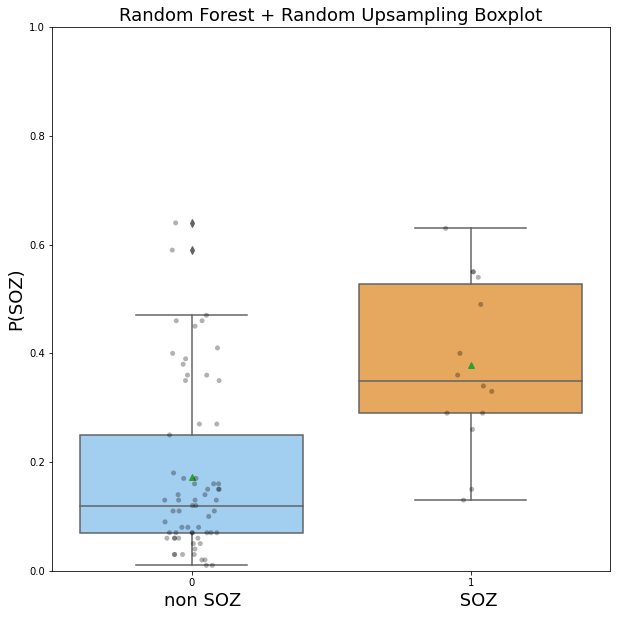

In [15]:
# Plotting boxplot
import seaborn as sns

plt.figure(figsize = (10,10))
plt.title("Random Forest + Random Upsampling Boxplot", fontsize = 18)
plt.xlabel("non SOZ                                      SOZ", fontsize = 18)
plt.ylabel("P(SOZ)", fontsize = 18)
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


Most Significant Feature:  Closeness
Least Significant Feature:  SigStim


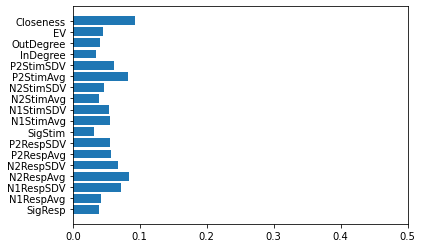

In [16]:
rf.feature_importances_

plt.barh(X_list[1:], rf.feature_importances_)
plt.xlim([0,.5])
print("Most Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(max(rf.feature_importances_))])
print("Least Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(min(rf.feature_importances_))])